In [12]:
from scipy.io import netcdf
import scipy
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
plt.rcParams.update({'font.size': 22})

In [13]:
def readMODELnc(filename, var):
    """ 
    Read a variable from a NEMO output (netcdf 3 or 4)
    """

    f = netcdf.netcdf_file(filename, 'r')
    data = f.variables[var].data
    f.close()

    return data



## Extract the thermocline depth (depth of the 13C isotherm) for the 4 Celtic sea moorings ##

In [14]:
###### AMM60 #####
list_mooring = ['ST1','ST2','ST4','ST5']
Tlen = 720
depth_thermocline_mod = np.zeros((Tlen,4))
depth_thermocline_obs =  np.zeros((Tlen,4))
depth_anom_mod = np.zeros((Tlen,4))
depth_anom_obs =  np.zeros((Tlen,4))


count = 0
for numb in list_mooring:
    print(numb)
    filename = '/media/data1/AMM60/FASTNEt/AMM60/mooring_' + numb +'.nc'
    temp_obs = readMODELnc(filename,'temp_obs')[:,0:Tlen]
    temp_mod = readMODELnc(filename,'temp_mod')[:,0:Tlen]
    depth = readMODELnc(filename,'depth')
    temp_mod_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
    temp_obs_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
    for ii in range(0,temp_mod.shape[0]):
        x = temp_mod[ii,:]
        mask = np.isfinite(x)
        xi = np.arange(len(x))
        if mask.sum() != 0:
            xfiltered = np.interp(xi, xi[mask], x[mask])
            temp_mod_noNaN[ii,:] = xfiltered
            x = temp_obs[ii,:]
            mask = np.isfinite(x)
            xi = np.arange(len(x))
            xfiltered = np.interp(xi, xi[mask], x[mask])
            temp_obs_noNaN[ii,:] = xfiltered
    
    depth_thermocline_mod[:,count] = depth[np.argmin(abs(temp_mod_noNaN-13),axis=0)]
    depth_thermocline_obs[:,count] = depth[np.argmin(abs(temp_obs_noNaN-13),axis=0)]
    depth_anom_mod[:,count] = depth_thermocline_mod[:,count] - depth_thermocline_mod[:,count].mean()
    depth_anom_obs[:,count] = depth_thermocline_obs[:,count] - depth_thermocline_obs[:,count].mean()
    count += 1

### FFT ###
len_seg = 257
fftobsamm60 = np.zeros((int(len_seg/2)+1,depth_thermocline_obs.shape[1]))
fftmodamm60 = np.zeros((int(len_seg/2)+1,depth_thermocline_mod.shape[1]))
for xx in range(0,4):
    famm60, fftobsamm60[:,xx] = scipy.signal.welch(depth_anom_obs[:,xx], fs=1.0, window='hanning', nperseg=len_seg, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)    
    famm60, fftmodamm60[:,xx] = scipy.signal.welch(depth_anom_mod[:,xx], fs=1.0, window='hanning', nperseg=len_seg, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)



ST1
ST2
ST4
ST5


In [15]:
###### AMM7 #####
list_mooring = ['ST1','ST2','ST4','ST5']
Tlen = 720

depth_thermocline_mod = np.zeros((Tlen,4))
depth_thermocline_obs =  np.zeros((Tlen,4))
depth_anom_mod = np.zeros((Tlen,4))
depth_anom_obs =  np.zeros((Tlen,4))
print(depth_thermocline_mod.shape)

count = 0
for numb in list_mooring:
    print(numb)
    filename = '/media/data1/AMM60/FASTNEt/AMM7/mooring_' + numb +'.nc'
    temp_obs = readMODELnc(filename,'temp_obs')[:,0:Tlen]
    temp_mod = readMODELnc(filename,'temp_mod')[:,0:Tlen]
    depth = readMODELnc(filename,'depth')
    temp_mod_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
    temp_obs_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
    for ii in range(0,temp_mod.shape[0]):
        x = temp_mod[ii,:]
        mask = np.isfinite(x)
        xi = np.arange(len(x))
        if mask.sum() != 0:
            xfiltered = np.interp(xi, xi[mask], x[mask])
            temp_mod_noNaN[ii,:] = xfiltered
            x = temp_obs[ii,:]
            mask = np.isfinite(x)
            xi = np.arange(len(x))
            xfiltered = np.interp(xi, xi[mask], x[mask])
            temp_obs_noNaN[ii,:] = xfiltered
    
    depth_thermocline_mod[:,count] = depth[np.argmin(abs(temp_mod_noNaN-13),axis=0)]
    depth_thermocline_obs[:,count] = depth[np.argmin(abs(temp_obs_noNaN-13),axis=0)]
    depth_anom_mod[:,count] = depth_thermocline_mod[:,count] - depth_thermocline_mod[:,count].mean()
    depth_anom_obs[:,count] = depth_thermocline_obs[:,count] - depth_thermocline_obs[:,count].mean()
    count += 1

### FFT ###
len_seg = 257
fftobsamm7 = np.zeros((int(len_seg/2)+1,depth_thermocline_obs.shape[1]))
fftmodamm7 = np.zeros((int(len_seg/2)+1,depth_thermocline_mod.shape[1]))
for xx in range(0,4):
    famm7, fftobsamm7[:,xx] = scipy.signal.welch(depth_anom_obs[:,xx], fs=1.0, window='hanning', nperseg=len_seg, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)    
    famm7, fftmodamm7[:,xx] = scipy.signal.welch(depth_anom_mod[:,xx], fs=1.0, window='hanning', nperseg=len_seg, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)



(720, 4)
ST1
ST2
ST4
ST5


In [16]:
###### NNA #####
list_mooring = ['ST1','ST2','ST4','ST5']
Tlen = 720
Tstart = 3649
depth_thermocline_mod = np.zeros((Tlen,4))
depth_anom_mod = np.zeros((Tlen,4))
print(depth_thermocline_mod.shape)

count = 0
for numb in list_mooring:
    print(numb)
    filename = '/media/data1/AMM60/FASTNEt/NNA/mooring_' + numb +'.nc'
    temp_mod = readMODELnc(filename,'temp_mod')[:,Tstart:Tstart+Tlen]
    depth = readMODELnc(filename,'depth')
    temp_mod_noNaN = np.zeros((temp_mod.shape[0]-1,temp_mod.shape[1]))
    for ii in range(0,temp_mod.shape[0]):
        x = temp_mod[ii,:]
        mask = np.isfinite(x)
        xi = np.arange(len(x))
        if mask.sum() != 0:
            xfiltered = np.interp(xi, xi[mask], x[mask])
            temp_mod_noNaN[ii,:] = xfiltered
    
    depth_thermocline_mod[:,count] = depth[np.argmin(abs(temp_mod_noNaN-13),axis=0)]
    depth_anom_mod[:,count] = depth_thermocline_mod[:,count] - depth_thermocline_mod[:,count].mean()
    count += 1

### FFT ###
len_seg = 257
fftobsnna = np.zeros((int(len_seg/2)+1,depth_thermocline_obs.shape[1]))
fftmodnna = np.zeros((int(len_seg/2)+1,depth_thermocline_mod.shape[1]))
for xx in range(0,4):
    fnna, fftmodnna[:,xx] = scipy.signal.welch(depth_anom_mod[:,xx], fs=1.0, window='hanning', nperseg=len_seg, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)



(720, 4)
ST1
ST2
ST4
ST5


## FFT ##

source 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html
https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Welch
import scipy
from scipy import signal

len_seg = int(depth_thermocline_mod/2)*2

f, Pxx_den = scipy.signal.welch(depth_thermocline_mod, fs=1.0, window='hanning', nperseg=len_seg, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)

plt.semilogy(f, Pxx_den)

#plt.ylim([0.5e-3, 1])

plt.xlabel('frequency [Hz]')

plt.ylabel('???')

plt.show()


  

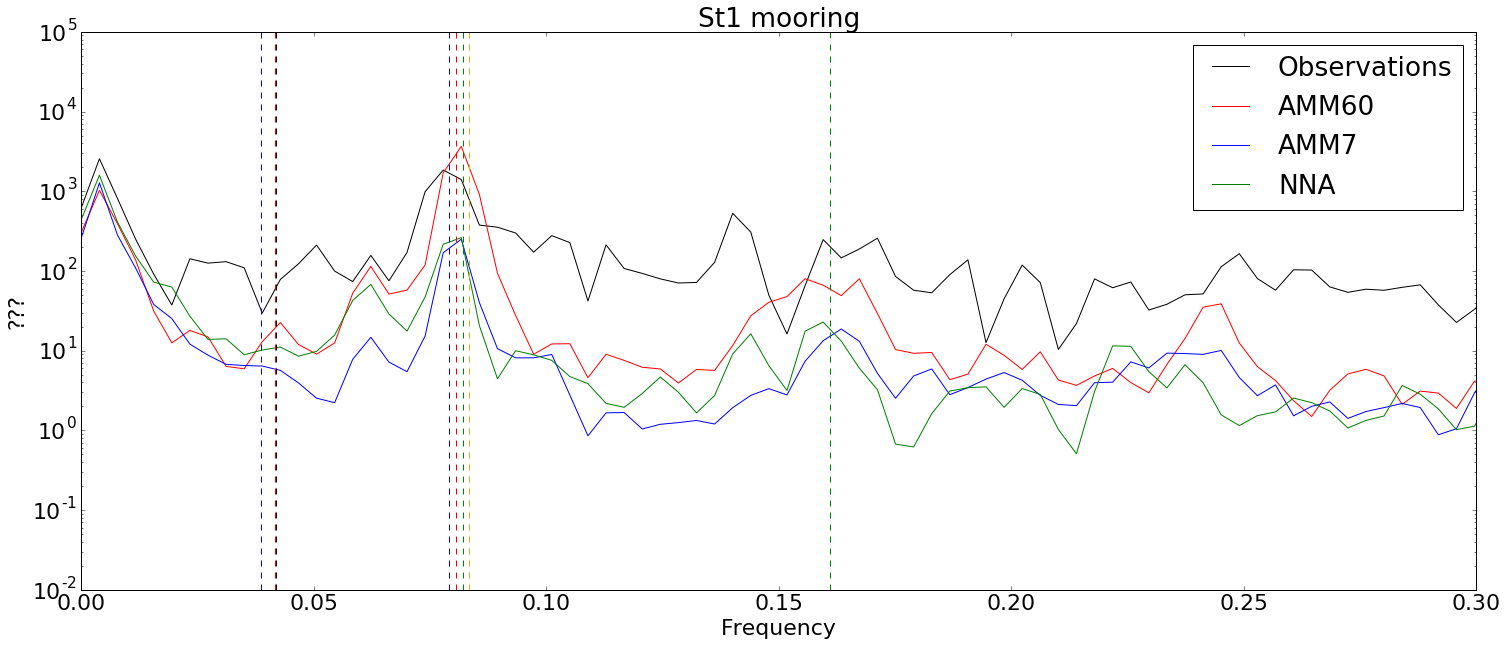

In [32]:
###### ST1 #######
plt.figure(figsize=(25, 10), dpi=250, facecolor='w', edgecolor='k')
#%matplotlib inline
plt.semilogy(famm60,fftobsamm60[:,0],color='k',label='Observations')
plt.hold()
plt.semilogy(famm60,fftmodamm60[:,0],color='r',label='AMM60')
plt.semilogy(famm7,fftmodamm7[:,0],color='b', label ='AMM7')
plt.semilogy(fnna,fftmodnna[:,0],color='g',label = 'NNA')


period_hrs = 12.42; lineformat = 'r--'; label='M2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)
#ax.text(1/(3600*period_hrs), 1E6, label)

period_hrs = 12.00; lineformat = 'y--'; label='S2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 25.82; lineformat = 'b--'; label='O1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 23.93; lineformat = 'k--'; label='K1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.66; lineformat = 'b--'; label='N2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 24.07; lineformat = 'r--'; label='P1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.19; lineformat = 'g--'; label='L2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 6.21; lineformat = 'g--'; label='M4'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

plt.xlim([0,0.3])
plt.ylim([0, 1E5])
plt.title('St1 mooring')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('???')

plt.savefig('St1.png')


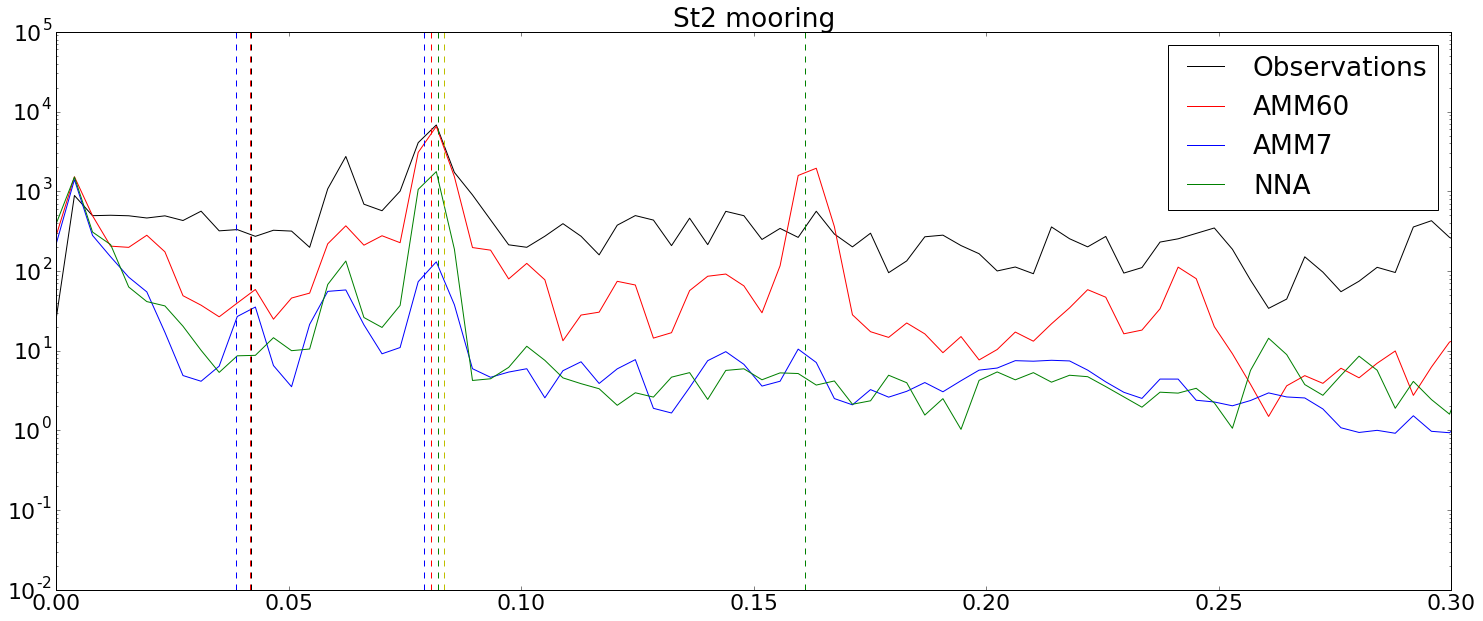

In [20]:
###### ST2 #######
plt.figure(figsize=(25, 10), dpi=250, facecolor='w', edgecolor='k')
#%matplotlib inline
plt.semilogy(famm60,fftobsamm60[:,1],color='k',label='Observations')
plt.hold()
plt.semilogy(famm60,fftmodamm60[:,1],color='r',label='AMM60')
plt.semilogy(famm7,fftmodamm7[:,1],color='b', label ='AMM7')
plt.semilogy(fnna,fftmodnna[:,1],color='g',label = 'NNA')


period_hrs = 12.42; lineformat = 'r--'; label='M2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)
#ax.text(1/(3600*period_hrs), 1E6, label)

period_hrs = 12.00; lineformat = 'y--'; label='S2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 25.82; lineformat = 'b--'; label='O1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 23.93; lineformat = 'k--'; label='K1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.66; lineformat = 'b--'; label='N2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 24.07; lineformat = 'r--'; label='P1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.19; lineformat = 'g--'; label='L2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 6.21; lineformat = 'g--'; label='M4'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

plt.xlim([0,0.3])
plt.ylim([0, 1E5])
plt.title('St2 mooring')
plt.legend()

plt.savefig('St2.png')


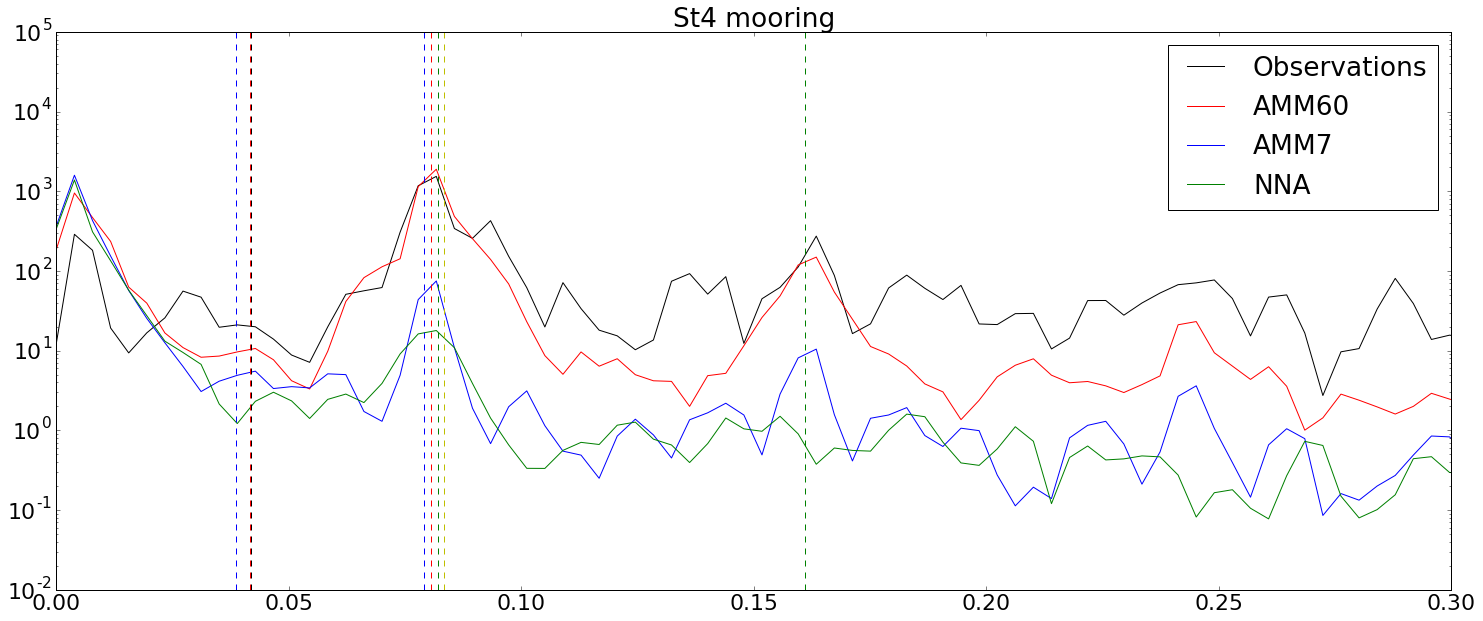

In [22]:
####### ST4 #########
plt.figure(figsize=(25, 10), dpi=250, facecolor='w', edgecolor='k')
#%matplotlib inline
plt.semilogy(famm60,fftobsamm60[:,2],color='k',label='Observations')
plt.hold()
plt.semilogy(famm60,fftmodamm60[:,2],color='r',label='AMM60')
plt.semilogy(famm7,fftmodamm7[:,2],color='b', label ='AMM7')
plt.semilogy(fnna,fftmodnna[:,2],color='g',label = 'NNA')


period_hrs = 12.42; lineformat = 'r--'; label='M2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)
#ax.text(1/(3600*period_hrs), 1E6, label)

period_hrs = 12.00; lineformat = 'y--'; label='S2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 25.82; lineformat = 'b--'; label='O1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 23.93; lineformat = 'k--'; label='K1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.66; lineformat = 'b--'; label='N2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 24.07; lineformat = 'r--'; label='P1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.19; lineformat = 'g--'; label='L2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 6.21; lineformat = 'g--'; label='M4'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

plt.xlim([0,0.3])
plt.ylim([0, 1E5])
plt.title('St4 mooring')
plt.legend()

plt.savefig('St4.png')








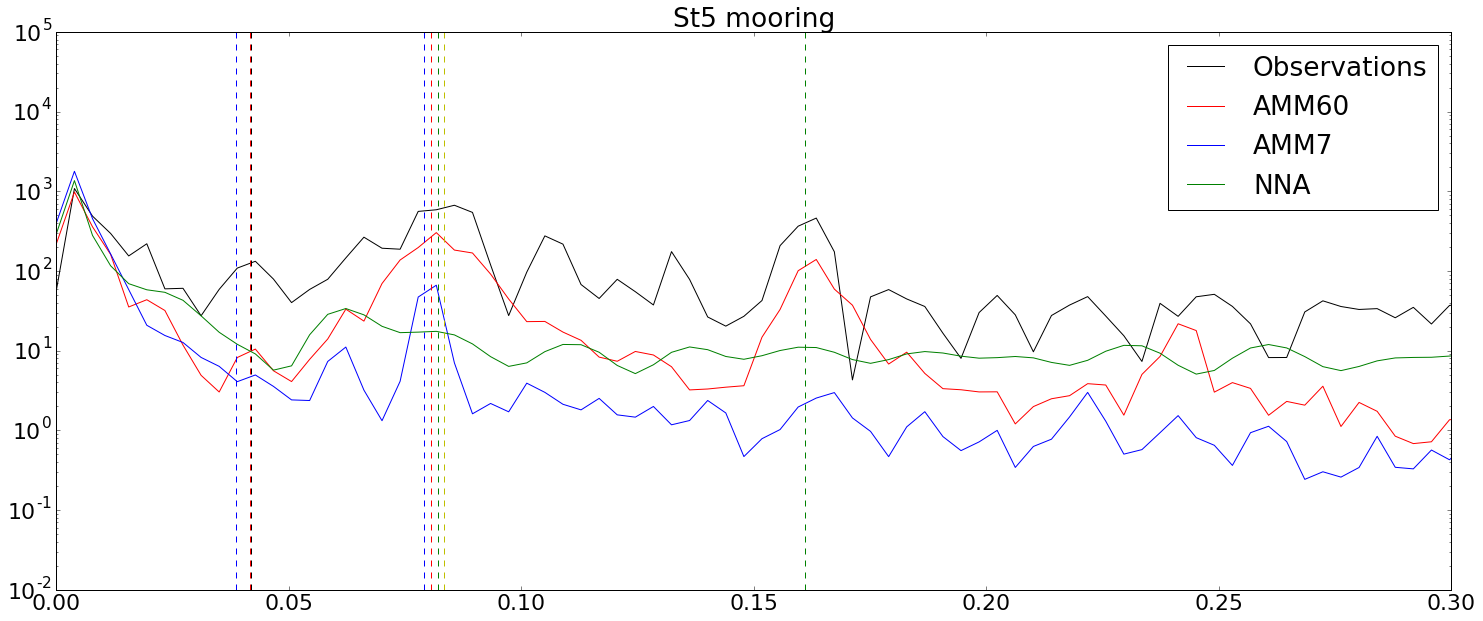

In [24]:
####### ST5 #########
plt.figure(figsize=(25, 10), dpi=250, facecolor='w', edgecolor='k')

#%matplotlib inline
plt.semilogy(famm60,fftobsamm60[:,3],color='k',label='Observations')
plt.hold()
plt.semilogy(famm60,fftmodamm60[:,3],color='r',label='AMM60')
plt.semilogy(famm7,fftmodamm7[:,3],color='b', label ='AMM7')
plt.semilogy(fnna,fftmodnna[:,3],color='g',label = 'NNA')


period_hrs = 12.42; lineformat = 'r--'; label='M2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)
#ax.text(1/(3600*period_hrs), 1E6, label)

period_hrs = 12.00; lineformat = 'y--'; label='S2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 25.82; lineformat = 'b--'; label='O1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 23.93; lineformat = 'k--'; label='K1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.66; lineformat = 'b--'; label='N2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 24.07; lineformat = 'r--'; label='P1'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 12.19; lineformat = 'g--'; label='L2'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

period_hrs = 6.21; lineformat = 'g--'; label='M4'
plt.semilogy( [1/period_hrs, 1/period_hrs], [1E-2, 1E7], lineformat)

plt.xlim([0,0.3])
plt.ylim([0, 1E5])
plt.title('St5 mooring')
plt.legend()

plt.savefig('St5.png')

